In [1]:
!pip install networkx

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import datetime as dt
from collections import defaultdict
from pprint import pprint
import networkx as nx
import csv

%matplotlib inline

In [3]:
df = pd.read_csv('WhatAppDataforDash.csv')
df.head()


,Date,Day,Time,Message,Person,RawData,Letters,Words,MediaCount,Year,Month
0,2018-08-16,Thrusday,20:12,Hello this is official grup,Chinmayee,"16/08/18, 20:12 - Chinmayee: Hello this is off...",28,6,0,2018,Aug
1,2018-08-16,Thrusday,20:12,Chusinam leaaa,Jagas,"16/08/18, 20:12 - Jagas: Chusinam leaaa",15,3,0,2018,Aug
2,2018-08-16,Thrusday,20:12,Admin cheyyi,+91 6309 604 570,"16/08/18, 20:12 - +91 6309 604 570: Admin cheyyi",13,3,0,2018,Aug
3,2018-08-16,Thrusday,20:12,First,+91 6309 604 570,"16/08/18, 20:12 - +91 6309 604 570: First",6,2,0,2018,Aug
4,2018-08-16,Thrusday,20:12,Kkkk,Kalyan,"16/08/18, 20:12 - Kalyan: Kkkk",5,2,0,2018,Aug


In [4]:
def getdf(person,mapper,year):
    dummy = pd.DataFrame(mapper.items(),columns=['Replier','ReplyCount'])
    dummy['Sender'] = [person]*(dummy.shape[0])
    dummy['Year'] = [year]*(dummy.shape[0])
    dummy = dummy[['Sender','Replier','ReplyCount','Year']]
    return dummy

In [5]:
def gettoprepliers(year):
    
    df_2019 = df[df['Year']==year]
    persons_list = list(df_2019['Person'])
    persons_map = dict(zip(persons_list,map(persons_list.count,persons_list)))
    persons_map = dict(sorted(persons_map.items(),key=lambda x:x[1],reverse=True))
    persons_map = dict(list(persons_map.items())[:10])
    top10person = list(persons_map.keys())
    topmonth = list(df_2019['Month'].unique())


    total_person = {i+1:persons_list[i] for i in range(len(persons_list))}
    total_person_name = list(total_person.values())


    repliermap = {}

    for person in range(len(top10person[:5])):

        idx_list = []
        for i in range(len(persons_list)):
            if persons_list[i]==top10person[person]:
                idx_list.append(i)


        finalres = []
        for idx in range(len(idx_list)-1):

            slicer = total_person_name[idx_list[idx]:idx_list[idx+1]]

            slicer = list(set(slicer))

            idx1 = slicer.index(top10person[person])

            del slicer[idx1]

            if len(slicer)!=0:
                finalres.append(slicer)


        finalres_flat = sum(finalres,[])
        finalres_count = dict(zip(finalres_flat,map(finalres_flat.count,finalres_flat)))
        finalres_count = dict(sorted(finalres_count.items(),key = lambda x:x[1],reverse=True))
        finalres_count = dict(list(finalres_count.items())[:5])

        repliermap[top10person[person]] = finalres_count
        
    return repliermap


concatlist = []
year_list = [2018,2019,2020,2021]
for year in year_list:
    repliermap = gettoprepliers(year)
    for key,val in repliermap.items():
        concatlist.append(getdf(key,val,year))
    
    
finaldf = pd.concat(concatlist)
finaldf

,Sender,Replier,ReplyCount,Year
0,+91 6309 604 570,Meet,44,2018
1,+91 6309 604 570,Chinmayee,33,2018
2,+91 6309 604 570,Jagas,28,2018
3,+91 6309 604 570,Harifriend,21,2018
4,+91 6309 604 570,Ravi Raju Sir,19,2018
...,...,...,...,...
0,+91 94900 29735,Asha Ma'am,48,2021
1,+91 94900 29735,+91 90005 37903,30,2021
2,+91 94900 29735,+91 90107 88369,29,2021
3,+91 94900 29735,Ravi Raju Sir,16,2021


In [6]:
finaldf.to_csv('TopRepliersforxpersonsmsg.csv',index=None)

## For Dashboard purpose

In [49]:
df = pd.read_csv('TopRepliersforxpersonsmsg.csv')
df.head()

,Sender,Replier,ReplyCount,Year
0,+91 6309 604 570,Meet,44,2018
1,+91 6309 604 570,Chinmayee,33,2018
2,+91 6309 604 570,Jagas,28,2018
3,+91 6309 604 570,Harifriend,21,2018
4,+91 6309 604 570,Ravi Raju Sir,19,2018


In [55]:
sender_list = list(set(list(df['Sender'])))
year_list = list(set(list(df['Year'])))

In [56]:
data = df[(df['Sender']==sender_list[0])&(df['Year']==2018)]
data

,Sender,Replier,ReplyCount,Year
20,Jagas,+91 6309 604 570,29,2018
21,Jagas,Meet,24,2018
22,Jagas,Chinmayee,22,2018
23,Jagas,Harifriend,21,2018
24,Jagas,Ali,13,2018


In [57]:
sender = list(data['Sender'])
replier = list(data['Replier'])
replycount = list(data['ReplyCount'])

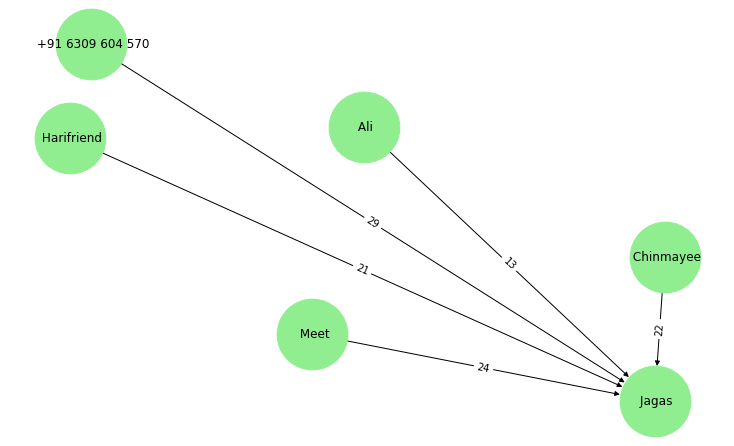

In [59]:
 G = nx.DiGraph()

for i,j,k in zip(range(len(sender)),range(len(replier)),range(len(replycount))):

        G.add_edge(replier[j],sender[i], weight=replycount[k], title=replycount[k], subtitle='testing',color = 'magenta')


edge_labels = nx.get_edge_attributes(G, 'title')


plt.figure(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True,node_size = 5000,node_color='lightgreen')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [74]:
df = pd.read_csv('TopRepliersforxpersonsmsg.csv')
df.head()

,Sender,Replier,ReplyCount,Year
0,+91 6309 604 570,Meet,44,2018
1,+91 6309 604 570,Chinmayee,33,2018
2,+91 6309 604 570,Jagas,28,2018
3,+91 6309 604 570,Harifriend,21,2018
4,+91 6309 604 570,Ravi Raju Sir,19,2018


In [76]:
year_list = list(set(list(df['Year'])))
sender = list(set(list(df['Sender'])))
print(len(year_list),len(sender))

4 13


In [83]:
def drawgraph(sender,replier,replycount):
    
    G = nx.DiGraph()
    for i,j,k in zip(range(len(sender)),range(len(replier)),range(len(replycount))):

            G.add_edge(replier[j],sender[i], weight=replycount[k], title=replycount[k], subtitle='testing',color = 'magenta')


    edge_labels = nx.get_edge_attributes(G, 'title')


    plt.figure(figsize=(10,6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True,node_size = 5000,node_color='lightgreen')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

 Sender :  Jagas,year : 2018


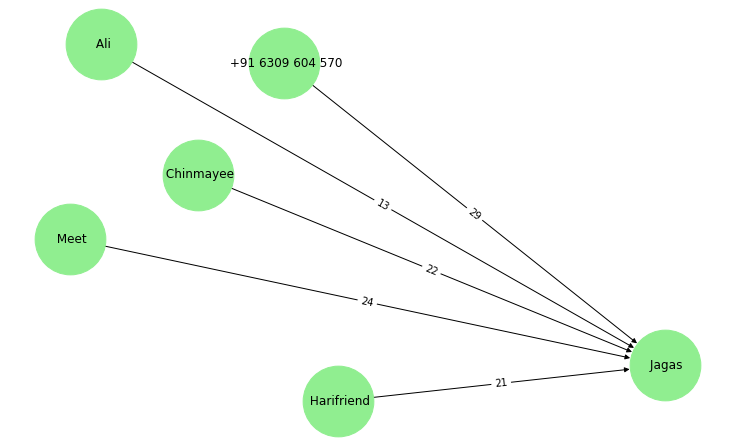

 Sender :  +91 85559 80272,year : 2018


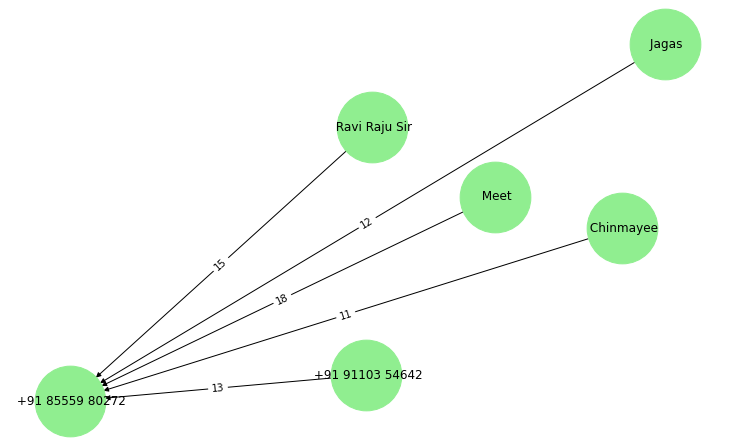

 Sender :  +91 6309 604 570,year : 2018


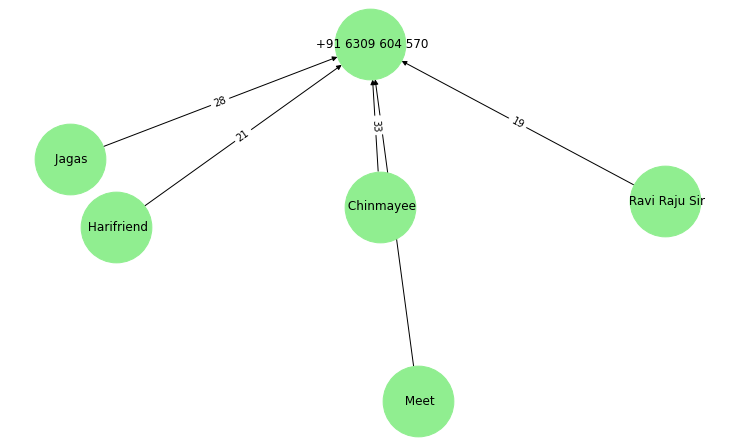

 Sender :  Chinmayee,year : 2018


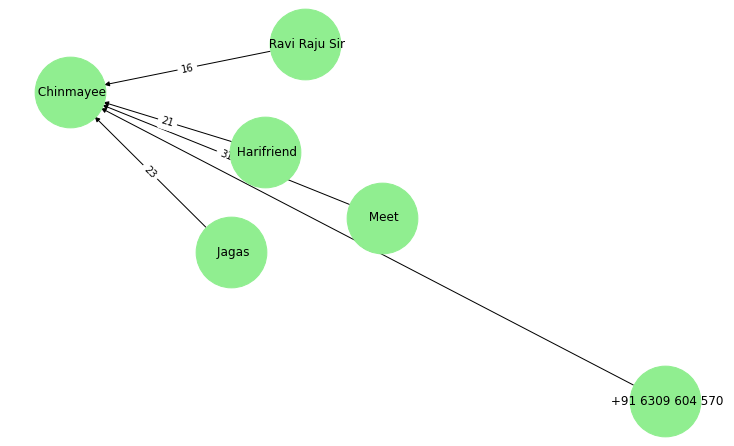

 Sender :  Meet,year : 2018


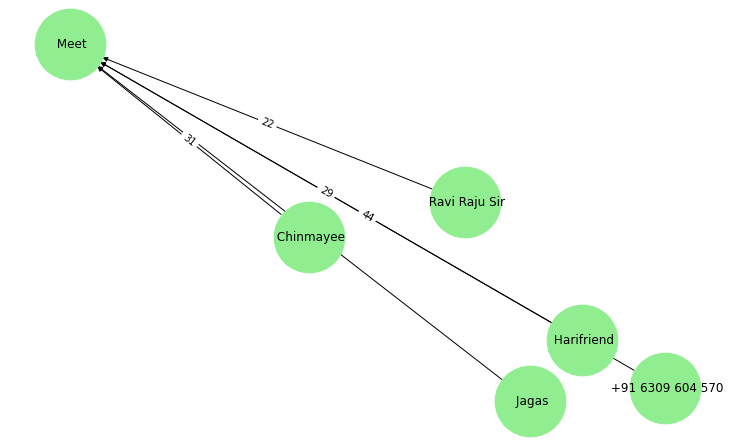

 Sender :  +91 85559 80272,year : 2019


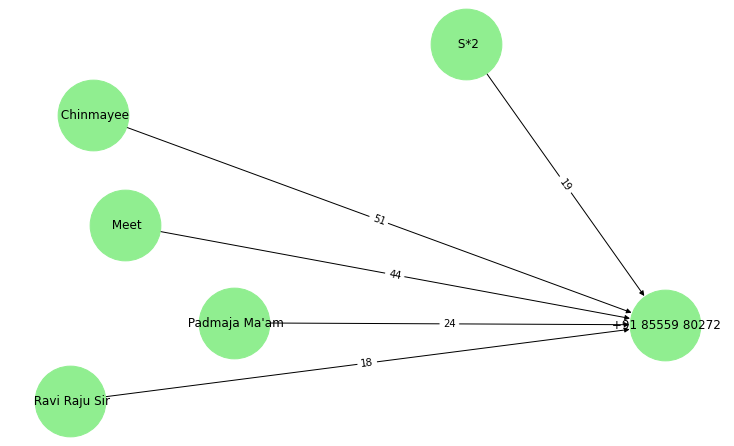

 Sender :  S*2,year : 2019


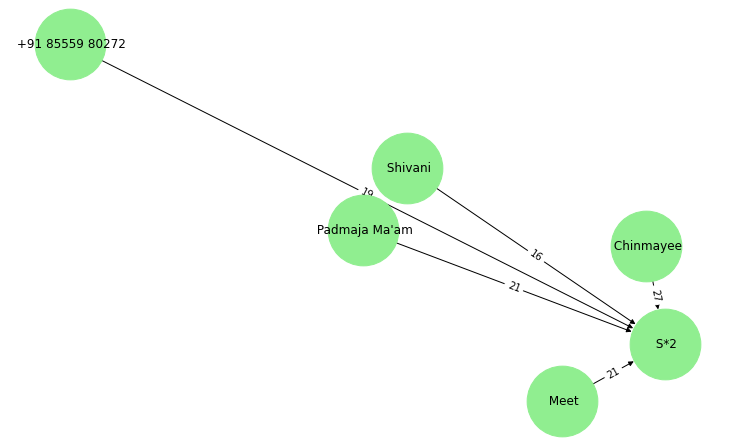

 Sender :  Chinmayee,year : 2019


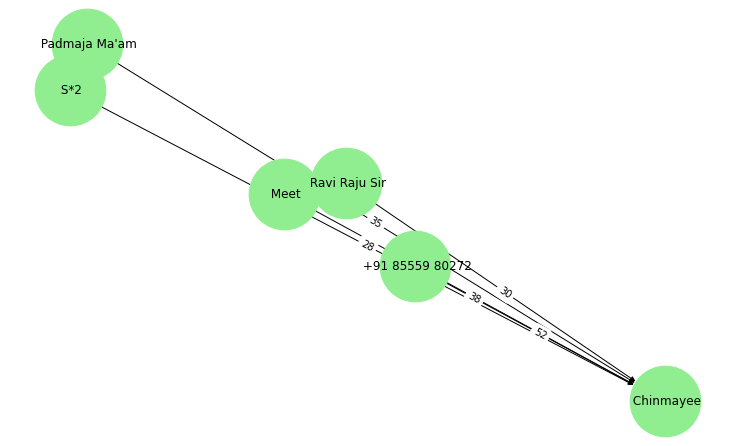

 Sender :  Meet,year : 2019


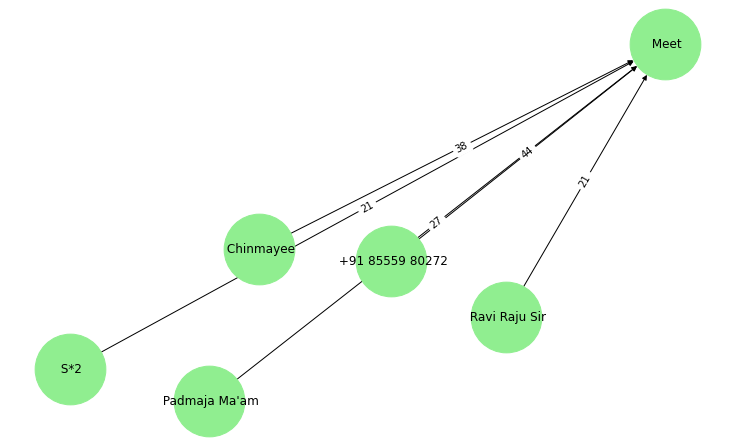

 Sender :  Padmaja Ma'am,year : 2019


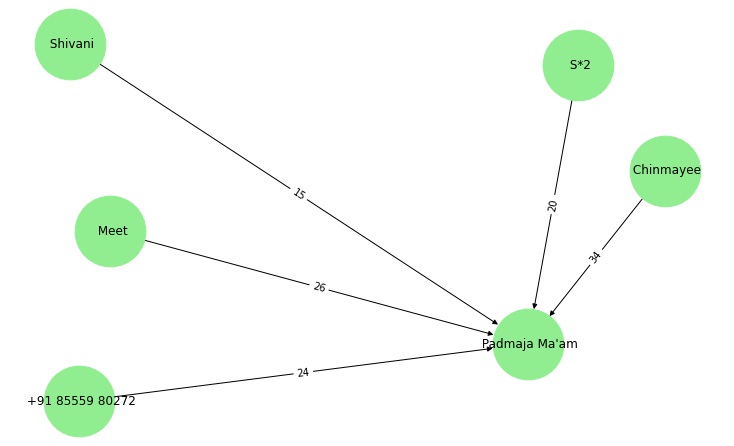

 Sender :  Asha Ma'am,year : 2020


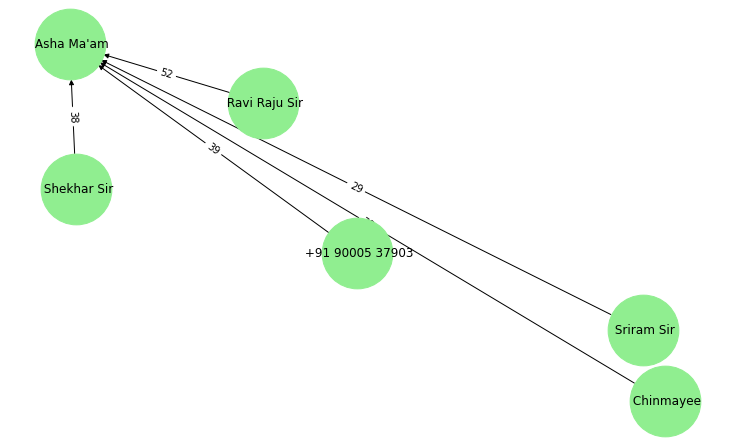

 Sender :  Sriram Sir,year : 2020


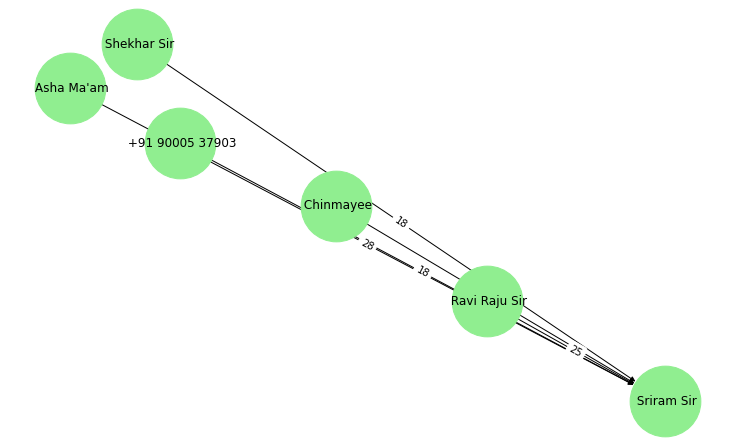

 Sender :  Chinmayee,year : 2020


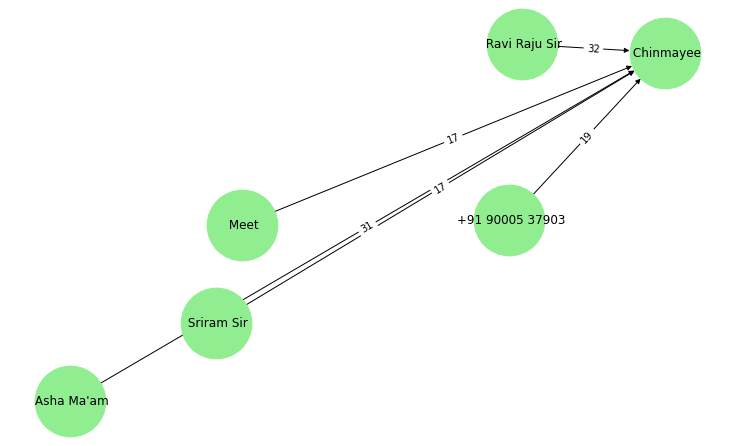

 Sender :  Ravi Raju Sir,year : 2020


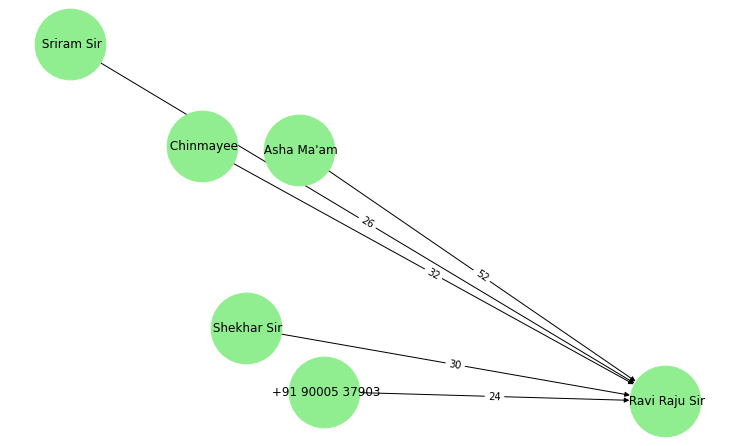

 Sender :  +91 90005 37903,year : 2020


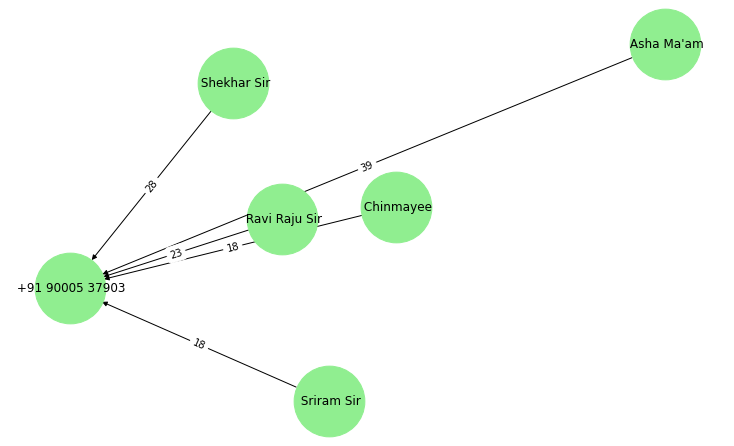

 Sender :  +91 94900 29735,year : 2021


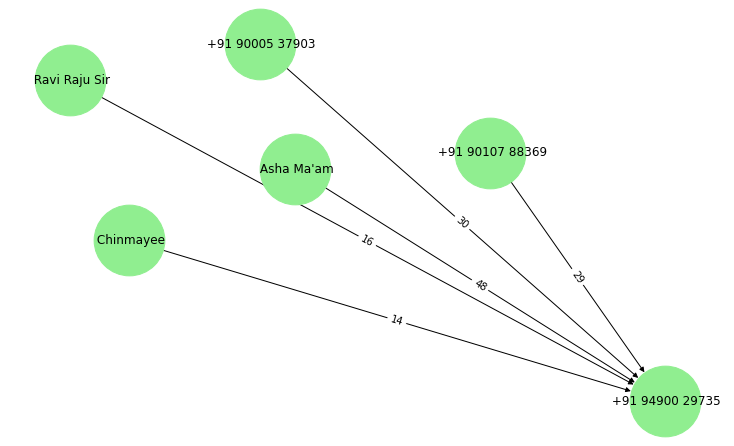

 Sender :  Asha Ma'am,year : 2021


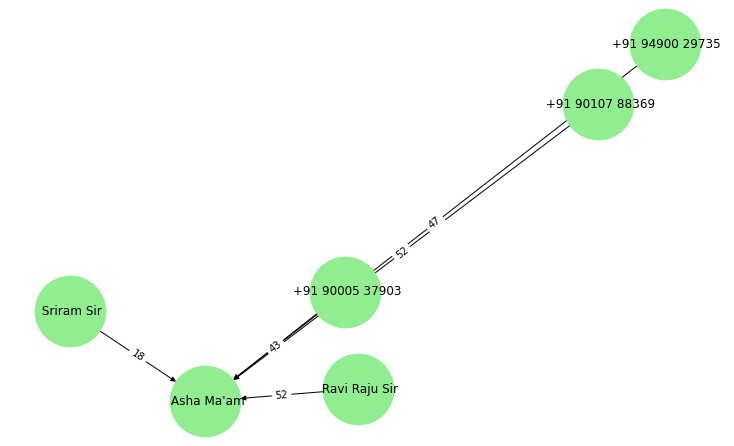

 Sender :  +91 90107 88369,year : 2021


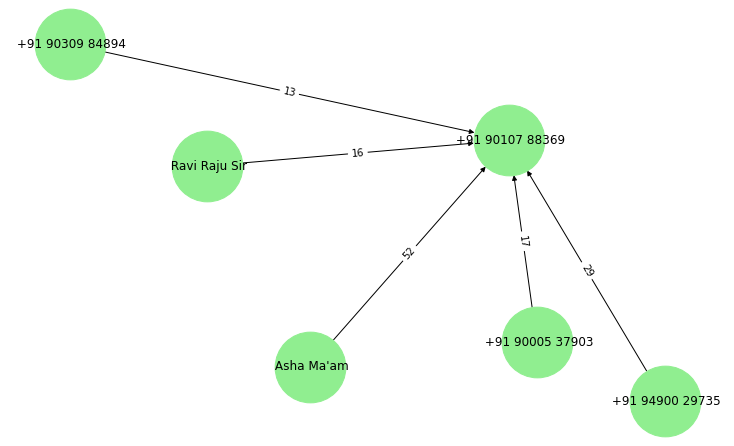

 Sender :  Ravi Raju Sir,year : 2021


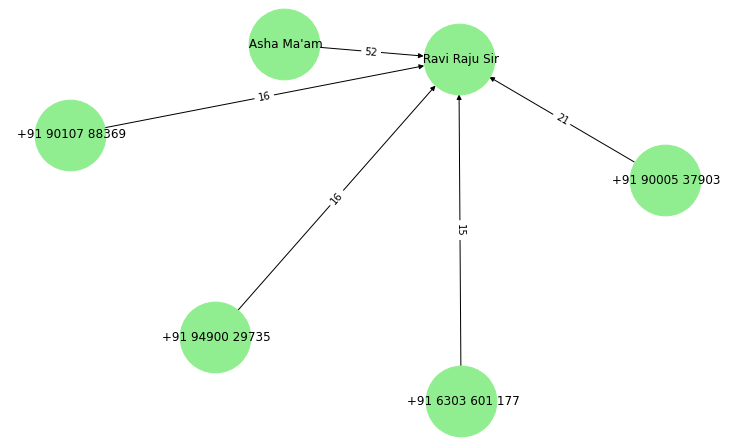

 Sender :  +91 90005 37903,year : 2021


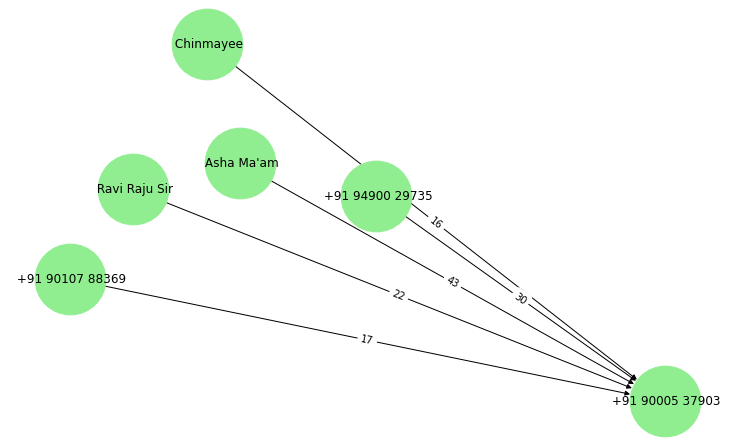

In [88]:
for year in range(len(year_list)):
    
    for person in range(len(sender)):
        
        data = df[(df['Sender']==sender[person])&(df['Year']==year_list[year])]
        
        if data.shape[0]!=0:
            print(f' Sender : {sender[person]},year : {year_list[year]}')
            
            senderlist = list(data['Sender'])
            replierlist = list(data['Replier'])
            replycountlist = list(data['ReplyCount'])
            
            drawgraph(senderlist,replierlist,replycountlist)
            

In [2]:
dummy = pd.read_csv('https://raw.githubusercontent.com/mv1249/WhatsappTextAnalysis/main/WhatAppDataforDash.csv')
dummy

,Date,Day,Time,Message,Person,RawData,Letters,Words,MediaCount,Year,Month
0,2018-08-16,Thrusday,20:12,Hello this is official grup,Chinmayee,"16/08/18, 20:12 - Chinmayee: Hello this is off...",28,6,0,2018,Aug
1,2018-08-16,Thrusday,20:12,Chusinam leaaa,Jagas,"16/08/18, 20:12 - Jagas: Chusinam leaaa",15,3,0,2018,Aug
2,2018-08-16,Thrusday,20:12,Admin cheyyi,+91 6309 604 570,"16/08/18, 20:12 - +91 6309 604 570: Admin cheyyi",13,3,0,2018,Aug
3,2018-08-16,Thrusday,20:12,First,+91 6309 604 570,"16/08/18, 20:12 - +91 6309 604 570: First",6,2,0,2018,Aug
4,2018-08-16,Thrusday,20:12,Kkkk,Kalyan,"16/08/18, 20:12 - Kalyan: Kkkk",5,2,0,2018,Aug
...,...,...,...,...,...,...,...,...,...,...,...
6626,2021-03-07,Sunday,12:43,Please join for the class at 1,+91 90107 88369,"03/07/21, 12:43 - +91 90107 88369: Please join...",31,8,0,2021,Mar
6627,2021-03-07,Sunday,12:43,For DAA,+91 90107 88369,"03/07/21, 12:43 - +91 90107 88369: For DAA",8,3,0,2021,Mar
6628,2021-03-07,Sunday,13:03,Please join as soon as possible,+91 90107 88369,"03/07/21, 13:03 - +91 90107 88369: Please join...",32,7,0,2021,Mar
6629,2021-03-07,Sunday,14:04,All of you join the ins class immediately,+91 6304 605 703,"03/07/21, 14:04 - +91 6304 605 703: All of you...",42,9,0,2021,Mar


### Flask Code

In [ ]:
from flask import Flask, render_template, request
import pandas as pd
import numpy as np
from collections import defaultdict

app = Flask(__name__)


@app.route('/', methods=['GET', 'POST'])
def hello_world():
    df = pd.read_csv(
        'https://raw.githubusercontent.com/mv1249/WhatsappTextAnalysis/main/WhatAppDataforDash.csv')
    df1 = pd.read_csv(
        'https://raw.githubusercontent.com/mv1249/WhatsappTextAnalysis/main/WhatsAppuserdata.csv')
    dates = pd.read_csv(
        'https://raw.githubusercontent.com/mv1249/WhatsappTextAnalysis/main/YearMonth.csv')

    rep1 = pd.read_csv(
        'https://raw.githubusercontent.com/mv1249/WhatsappTextAnalysis/main/WhatsAppReplierList.csv')

    finaldf = pd.read_csv(
        'https://raw.githubusercontent.com/mv1249/WhatsappTextAnalysis/main/TopRepliesfromX.csv')

    user_list = len(df['Person'].unique())
    years = sorted(list((set(list(dates['Year'])))))

    order = ['MessageCount', 'Avgcount',
             'Msgsentperweek', 'Media', 'ActiveTime']
    message_list = list(df['Message'])
    totalmsgs = len(message_list)
    media = np.sum(df['MediaCount'])
    wordcount = np.sum(df['Words'])
    touse = df.copy()

    # <-----------Top Messages10  in the Group--------------->

    message_map = df1[df1['Purpose'] == order[0]]
    top10user = list(message_map['User'])
    msg10count = list(message_map['Message'])

    # <---------------------------Messages End------------------------------>

    # <---------------------------Average Words per message by most active users----->

    user_map = df1[df1['Purpose'] == order[1]]
    useravgword = list(user_map['User'])
    useravgwordcount = list(user_map['Message'])

    # <---------------------------Average Words per message by most active users End----->

    # <-----------------------------Messages sent each day of week--------------------->

    dummydf = df1[df1['Purpose'] == order[2]]
    weekday = list(dummydf['User'])
    weekcount = list(dummydf['Message'])

    # <-----------------------------Messages sent each day of week end--------------------->

    # <-----------------------------Top10 Media Contributors--------------------->

    mediadict = df1[df1['Purpose'] == order[3]]
    mediauser = list(mediadict['User'])
    mediacount = list(mediadict['Message'])

    # <-----------------------------Top10 Media Contributors End--------------------->

    # <----------------------------Time when the Group was highly Active-------------->

    time_map = df1[df1['Purpose'] == order[4]]
    time = list(time_map['User'])
    timecount = list(time_map['Message'])

    # <----------------------------Time when the Group was highly Active end-------------->

    # <----------------------------Most Active year and month-------------->

    mapper = {'Jan': 0, 'Feb': 0, 'Mar': 0,
              'Apr': 0, 'May': 0, 'Jun': 0, 'Jul': 0}
    mapper1 = {'Aug': 470, 'Sep': 238, 'Oct': 179, 'Nov': 227, 'Dec': 73}
    finalmapper = mapper | mapper1
    finalmapper

    df_18_month = list(finalmapper.keys())
    df_18_count = list(finalmapper.values())

    # df_2019

    dummy1 = dates[dates['Year'] == years[1]]
    df_19_count = list(dummy1['Count'])

    # df_2020

    dummy2 = dates[dates['Year'] == years[2]]
    df_20_count = list(dummy2['Count'])

    # df_2021

    mapper30 = {'Jan': 154, 'Feb': 57, 'Mar': 234,
                'Apr': 570, 'Jun': 243, 'Jul': 70}
    mapper31 = {'Aug': 0, 'Sep': 0, 'Oct': 0, 'Nov': 0, 'Dec': 0}
    mapper_mix = mapper30 | mapper31
    send_count = list(mapper_mix.values())

    # <----------------------------Most Active year and month-------------->

    # <------------------------------------Replier list------------------>

    # 2018

    rep_18 = rep1[rep1['Year'] == 2018]
    user_18 = list(rep_18['User'])
    user_18_count = list(rep_18['Reply Count'])

    mapper_18 = dict(zip(user_18, user_18_count))

    # 2019

    rep_19 = rep1[rep1['Year'] == 2019]
    user_19 = list(rep_19['User'])
    user_19_count = list(rep_19['Reply Count'])

    mapper_19 = dict(zip(user_19, user_19_count))

    # 2020

    rep_20 = rep1[rep1['Year'] == 2020]
    user_20 = list(rep_20['User'])
    user_20_count = list(rep_20['Reply Count'])
    mapper_20 = dict(zip(user_20, user_20_count))

    # 2021

    rep_21 = rep1[rep1['Year'] == 2021]
    user_21 = list(rep_21['User'])
    user_21_count = list(rep_21['Reply Count'])

    mapper_21 = dict(zip(user_21, user_21_count))

    combination = user_18+user_19+user_20+user_21
    combination_set = list(set(combination))

    user_18_map = {}
    user_19_map = {}
    user_20_map = {}
    user_21_map = {}

    # 2018
    for i in combination_set:
        if i in user_18:
            user_18_map[i] = mapper_18[i]
        else:
            user_18_map[i] = 20

    # 19 map

    for i in combination_set:
        if i in user_19:
            user_19_map[i] = mapper_19[i]
        else:
            user_19_map[i] = 20

    # 20 map

    for i in combination_set:
        if i in user_20:
            user_20_map[i] = mapper_20[i]
        else:
            user_20_map[i] = 20

    # 21 map
    for i in combination_set:
        if i in user_21:
            user_21_map[i] = mapper_21[i]

        else:
            user_21_map[i] = 20

    user_18 = list(user_18_map.keys())
    user_18_count = list(user_18_map.values())
    user_19_count = list(user_19_map.values())
    user_20_count = list(user_20_map.values())
    user_21_count = list(user_21_map.values())

    # <---------------------------TopRepliersfrom X-------------------------------------->

    def getdetails(detaillist, replierlist):

        names = [detaillist[i][0] for i in range(len(detaillist))]
        values = [detaillist[i][1] for i in range(len(detaillist))]

        returnmap = dict(zip(names, values))
        finalmap = {}
        for i in range(len(replierlist)):
            if replierlist[i] in returnmap.keys():
                finalmap[replierlist[i]] = returnmap[replierlist[i]]

            else:
                finalmap[replierlist[i]] = 25

        return finalmap

    senderlist = list(finaldf['Sender'])
    replierlist = list(finaldf['Replier'])
    repliercount = list(finaldf['Count'])

    finalreply = []
    for i in replierlist:
        if i not in finalreply:
            finalreply.append(i)

    finalmapper = defaultdict(list)

    for sender, replier, count in zip(senderlist, replierlist, repliercount):

        finalmapper[sender].append((replier, count))

    finalmapper = dict(finalmapper)
    finalkeys = list(finalmapper.keys())

    # user_1

    user1keys = list(getdetails(finalmapper[finalkeys[0]], finalreply).keys())

    user1vals = list(getdetails(
        finalmapper[finalkeys[0]], finalreply).values())

    # user2

    user2vals = list(getdetails(
        finalmapper[finalkeys[1]], finalreply).values())

    # user3

    user3vals = list(getdetails(
        finalmapper[finalkeys[2]], finalreply).values())

    # user4

    user4vals = list(getdetails(
        finalmapper[finalkeys[3]], finalreply).values())

    # user5
    user5vals = list(getdetails(
        finalmapper[finalkeys[4]], finalreply).values())

    return render_template('index.html', total_msg=totalmsgs,
                           top10user=top10user, msg10count=msg10count, totaluser=user_list, media=media, words=wordcount, avguser=useravgword,
                           avguserword=useravgwordcount, days=weekday, msgday=weekcount, mediauser=mediauser, mediacount=mediacount, time=time, timecount=timecount,
                           df_18_month=df_18_month,
                           df_18_count=df_18_count,
                           df_19_count=df_19_count,
                           df_20_count=df_20_count,
                           df_21_count=send_count, user_18=user_18, user_18_count=user_18_count,
                           user_19_count=user_19_count, user_20_count=user_20_count,
                           user_21_count=user_21_count,
                           user1keys=user1keys,
                           user1vals=user1vals,
                           user2vals=user2vals,
                           user3vals=user3vals,
                           user4vals=user4vals,
                           user5vals=user5vals,
                           topsenders=finalkeys)


if __name__ == '__main__':
    app.run(debug=True)
